In [1]:
!python --version

Python 3.7.3


## Wine Quality Analysis
## Citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [2]:
import pandas as pd 
import numpy as np

In [3]:
red_wine_df = pd.read_csv('winequality-red.csv',delimiter=';')
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine_df = pd.read_csv('winequality-white.csv',delimiter=';')
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EDA of Red Wine

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

**Descriptive Statistics**

In [6]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Quality Distribution of the wines.**

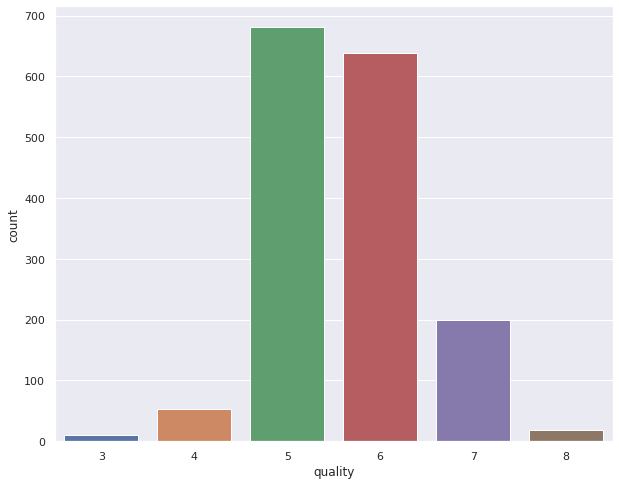

In [7]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(red_wine_df['quality'])

The above graph indicates that most of the red wines in the dataset has a quality of 5 or 6. There are few wines with higher and lower quality

**Corelation**

We will use pairplots and heatmaps to find out if there are any corelations between the features

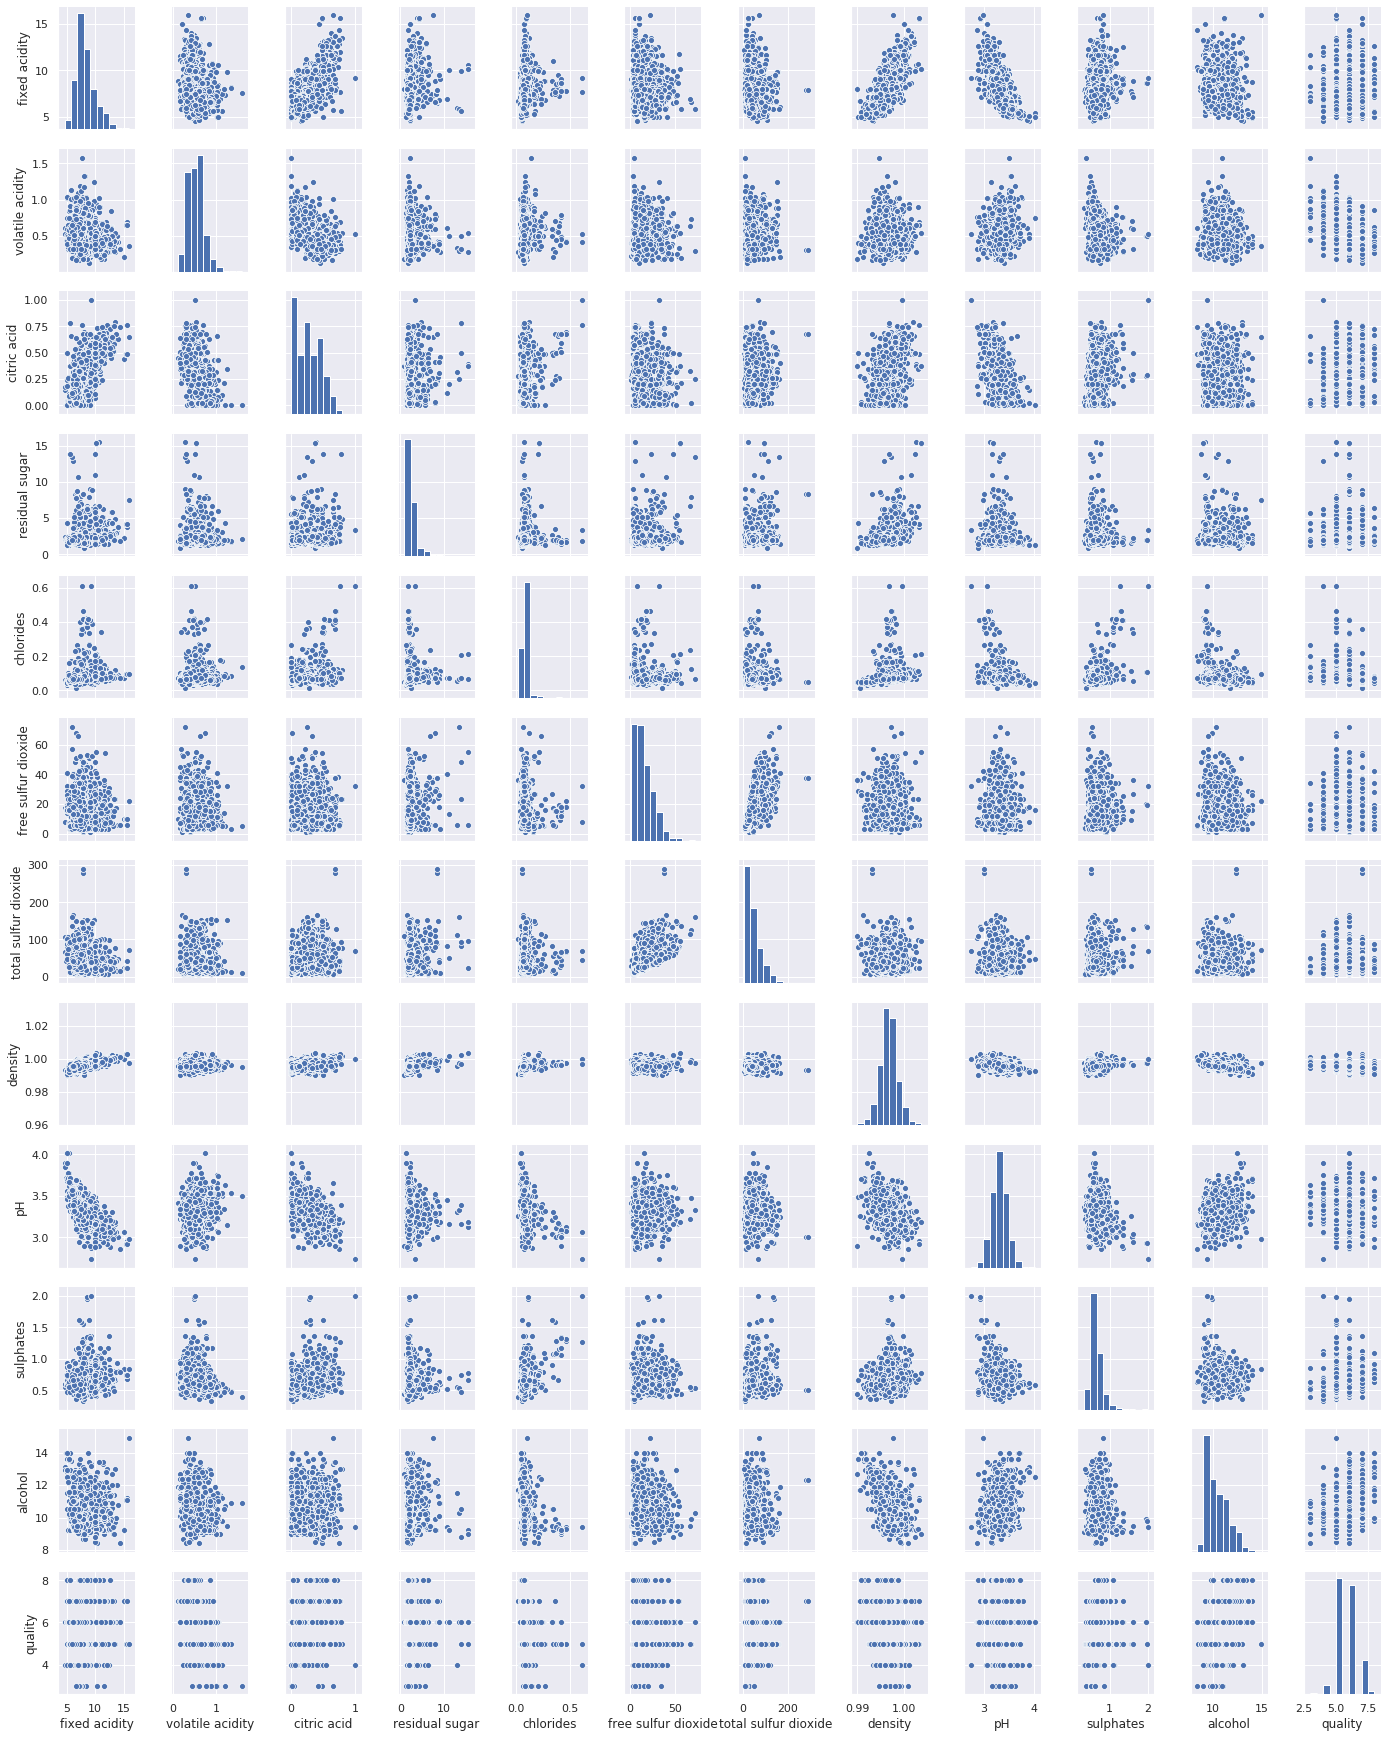

In [8]:

sns.pairplot(red_wine_df,height=2,aspect=0.8)

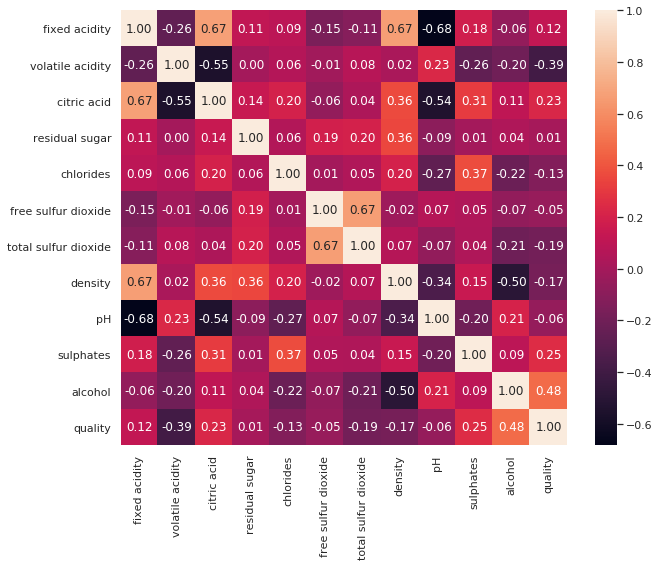

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(red_wine_df.corr(),annot=True,fmt=".2f")

1. From both the pairplot and heatmap, we can see that quality seems to have a strong corelation with alcohol.
2. pH has a strong negative corelation with fixed acidity and citric acid which is quite obvious.
3. Fixed acidity has strong positive corelation with density and citric acid.
4. Free sulpfur dioxide has strong positive corelation with total sulfur dioxide
5. Density has a negative corelation with alcohol.
6. Volatile acidity has negative corelation with citric acid.


**Skewness**

In [10]:
from scipy.stats import skew

In [11]:
cols = red_wine_df.columns

In [12]:
for col in cols:
    print("Skewness of ",col,": ",skew(red_wine_df[col]))

Skewness of  fixed acidity :  0.9818292953262073
Skewness of  volatile acidity :  0.6709623963499574
Skewness of  citric acid :  0.3180385895475358
Skewness of  residual sugar :  4.536394788805638
Skewness of  chlorides :  5.675016527504257
Skewness of  free sulfur dioxide :  1.249393847434253
Skewness of  total sulfur dioxide :  1.5141091878506638
Skewness of  density :  0.07122077153557972
Skewness of  pH :  0.19350175891005525
Skewness of  sulphates :  2.426393455449087
Skewness of  alcohol :  0.8600210646566755
Skewness of  quality :  0.21759720553467285


All the features have a positive skewness, which means there are high outliers. Sample for chlorides is below.

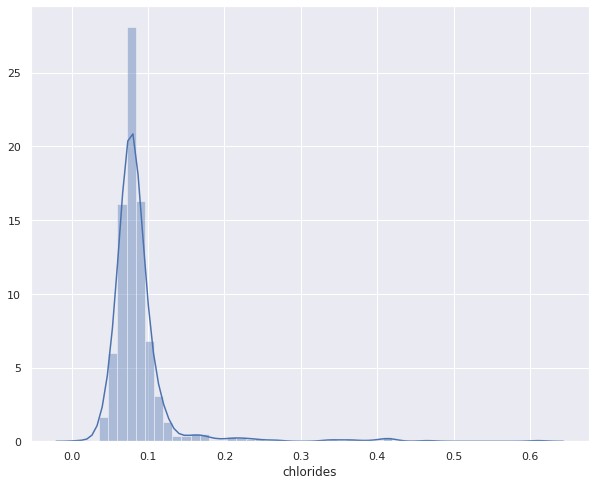

In [13]:
sns.distplot(red_wine_df['chlorides'])

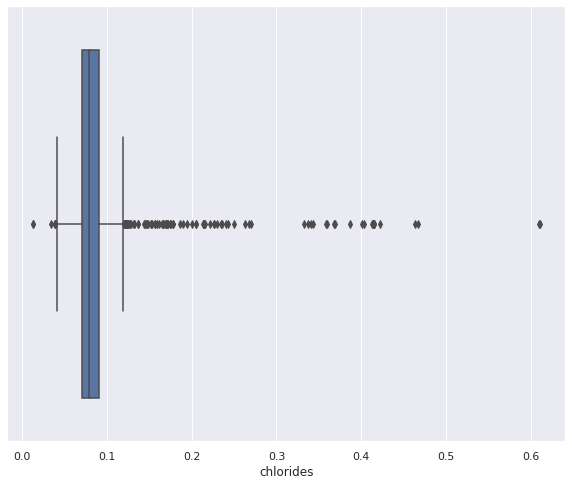

In [14]:
sns.boxplot(red_wine_df['chlorides'])

The above plots clearly shows the presence of high outliers for chlorides.

**Impact of alcohol on wine quality**

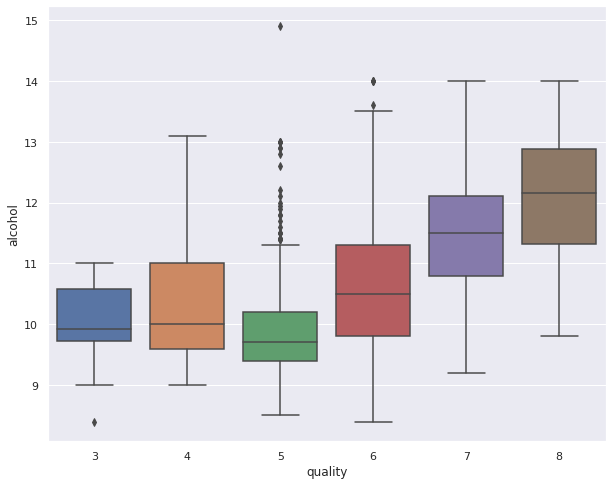

In [15]:
sns.boxplot(x='quality',y='alcohol',data=red_wine_df)

We can see that in a high quality wine the is high. We can see that the median of the alcohol contect is highest when the quality is 8.
This in a way implies that alcohol plays a strong role in determinig the quality.

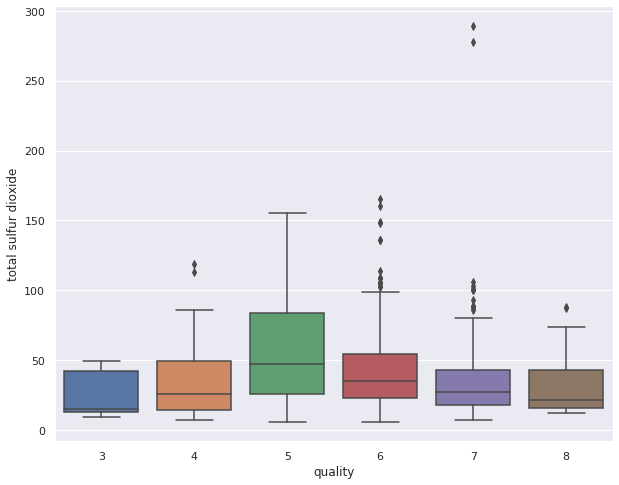

In [16]:
sns.boxplot(x='quality',y='total sulfur dioxide',data=red_wine_df)

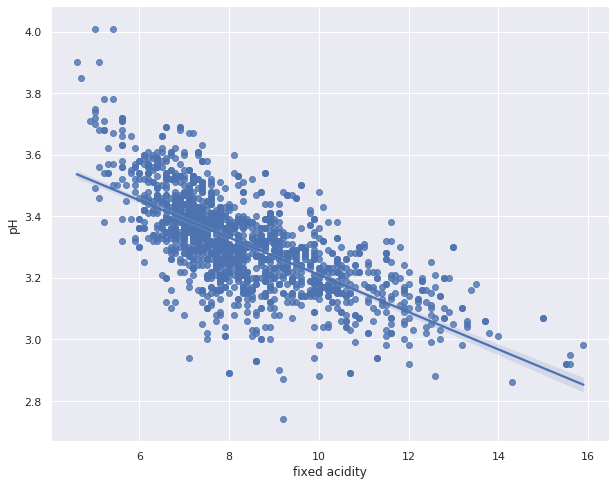

In [17]:
sns.regplot(x='fixed acidity',y='pH',data=red_wine_df)

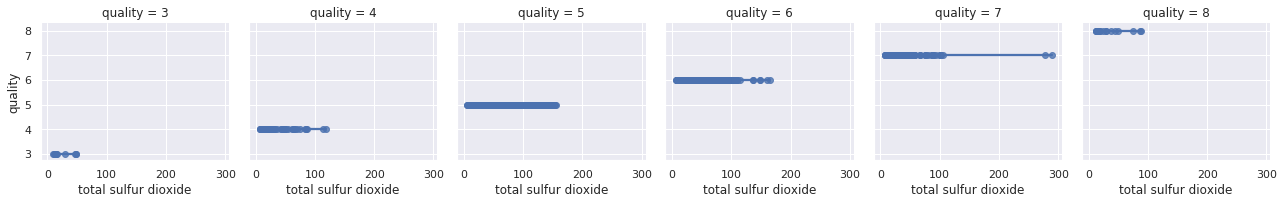

In [18]:
g = sns.FacetGrid(data=red_wine_df,col='quality')
g = g.map(sns.regplot,'total sulfur dioxide','quality')

## EDA for White wine quality

In [19]:
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Quality distribution of white wines**

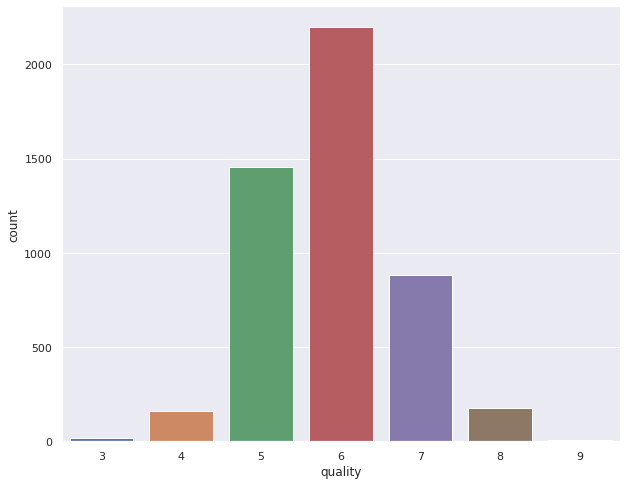

In [20]:
sns.countplot(white_wine_df['quality'])

**Corelation heatmap**

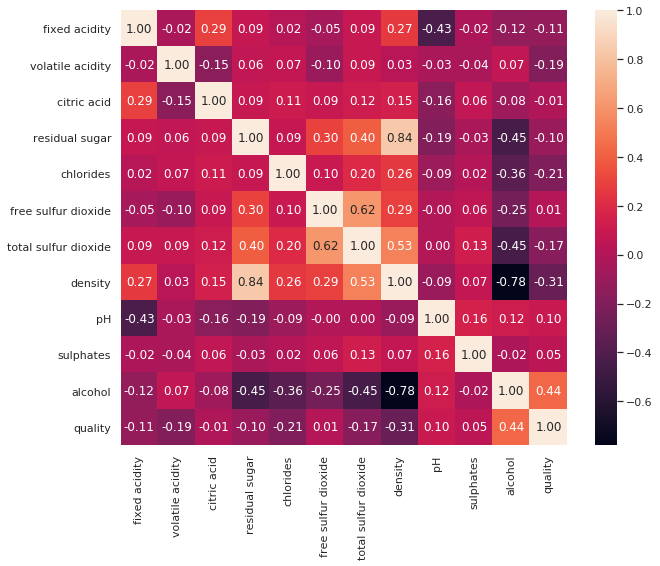

In [21]:
sns.heatmap(white_wine_df.corr(),annot=True,fmt='.2f')

## Red Wine vs White wine

In [22]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**By observing the columns Fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide and total sulfur dioxide, we can see a difference in the mean values**

**Examine each of these features in a box plot**

In [24]:
red_wine_df['type'] = 'red'
white_wine_df['type'] = 'white'

In [25]:
wine_df = pd.concat([red_wine_df,white_wine_df])

In [26]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


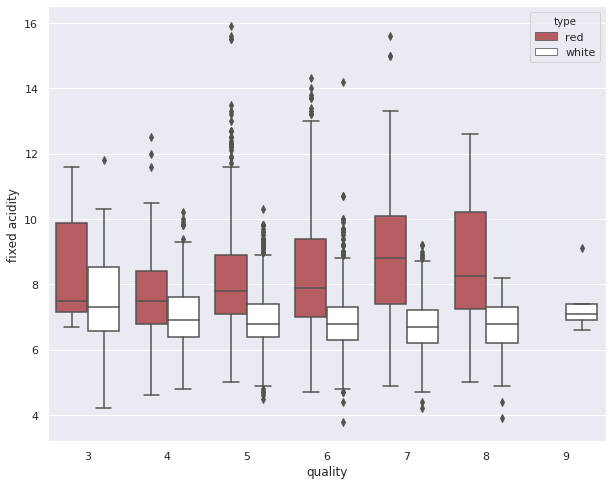

In [27]:
sns.boxplot(x='quality',y='fixed acidity',hue='type',data=wine_df,palette=['r','w'])

It seems like red wines have higher acidity than white wines.

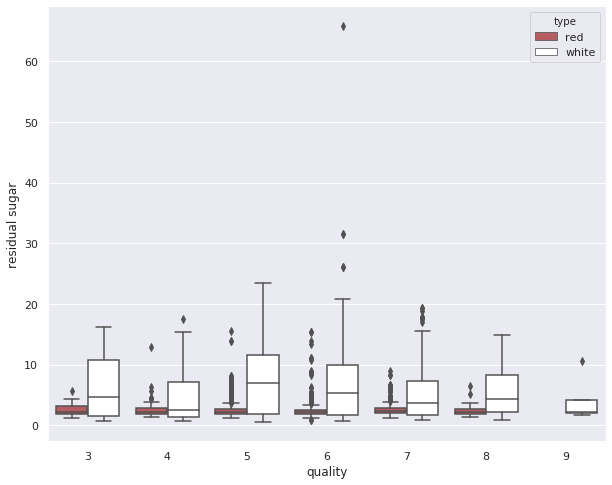

In [28]:
sns.boxplot(x='quality',y='residual sugar',hue='type',data=wine_df,palette=['r','w'])

Residual sugar quatities are more in white wines. We can also see a lot of high outliers in the residual sugar values for red wines. These outliers needs to be removed during model creation

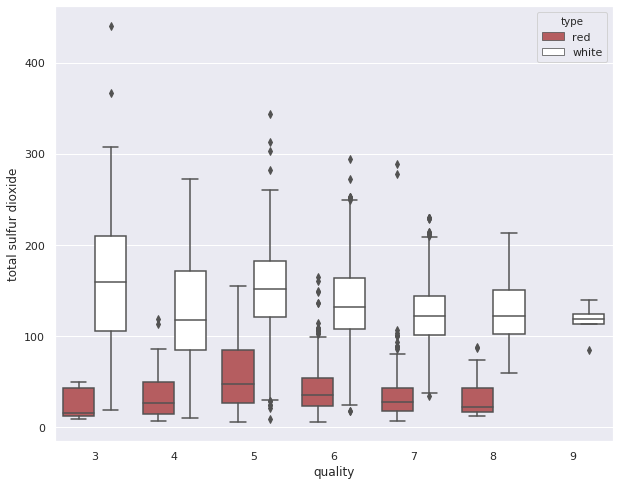

In [29]:
sns.boxplot(x='quality',y='total sulfur dioxide',hue='type',data=wine_df,palette=['r','w'])

Total sulfur dioxide is more in white wines

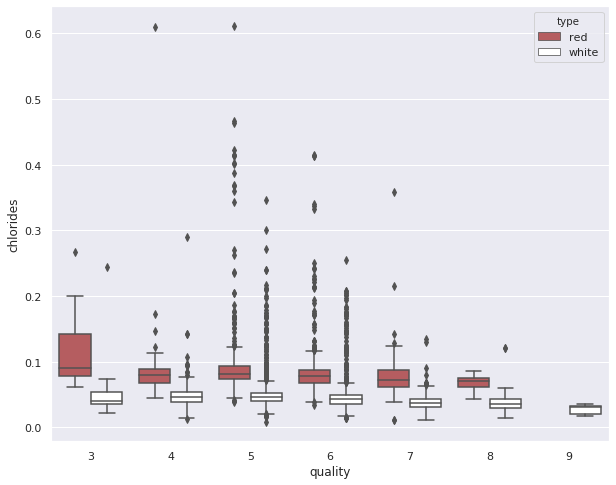

In [54]:
sns.boxplot(x='quality',y='chlorides',hue='type',data=wine_df,palette=['r','w'])

**From the above boxplots we can see that there are lot of positive outliers in our dataset. Let's check the skewness of each each feature and then take appropriate action**

In [30]:
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

In [31]:
for col in cols:
    print(col, '->',skew(wine_df[col]))

fixed acidity -> 1.7228917553916037
volatile acidity -> 1.4947513386353368
citric acid -> 0.4716217543120838
residual sugar -> 1.435072841441841
chlorides -> 5.398580962521251
free sulfur dioxide -> 1.219784372282318
total sulfur dioxide -> -0.001177206365785427
density -> 0.5034854532378833
pH -> 0.38674948061980574
sulphates -> 1.7968550310343996
alcohol -> 0.5655871101943215
quality -> 0.18957891127582208


We can see that most of the features have positive skewness and seems to have a lot of high outliers. Let's examine a few features using distplot and boxplot.

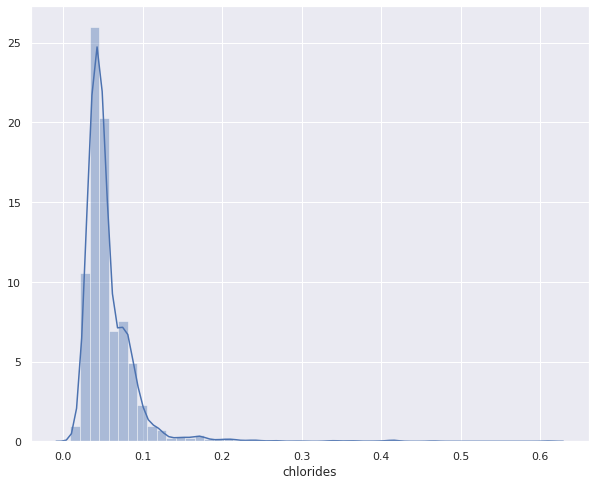

In [32]:
sns.distplot(wine_df['chlorides'])

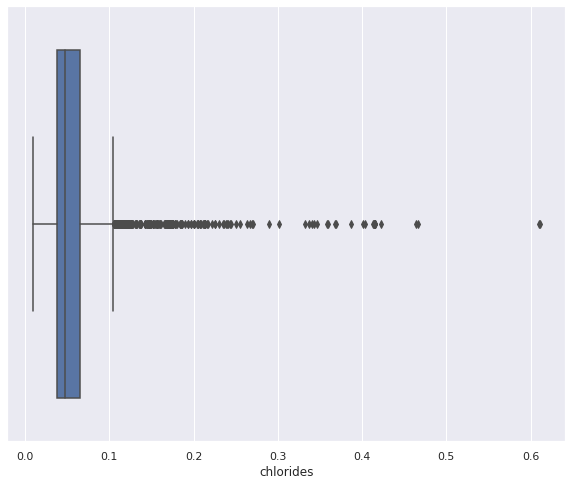

In [33]:
sns.boxplot(wine_df['chlorides'])

we can see a positive skew in the distplot and a high number of outliers in the boxplot.

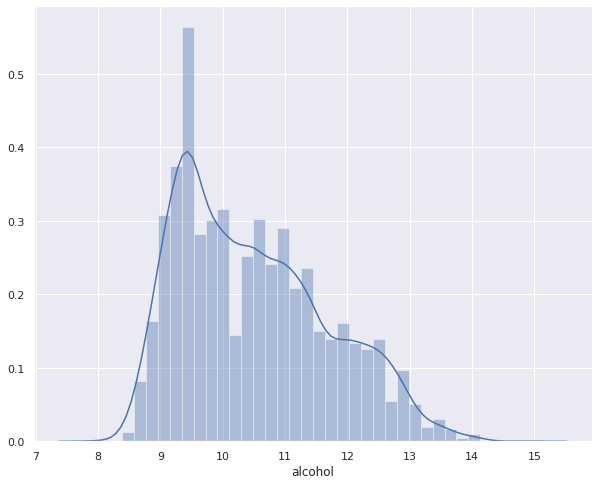

In [34]:
sns.distplot(wine_df['alcohol'])

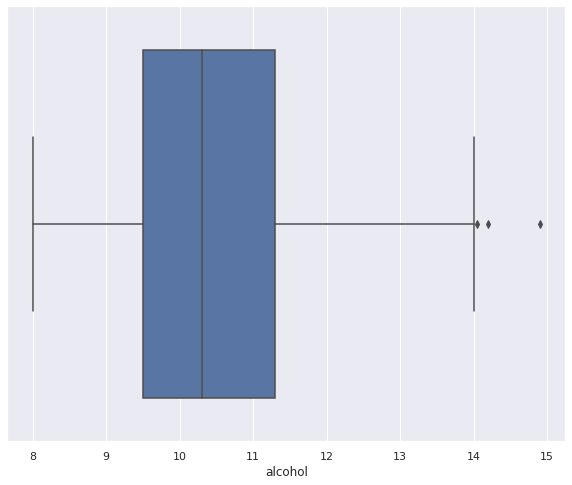

In [35]:
sns.boxplot(wine_df['alcohol'])

Not many outliers in the alcohol feature.

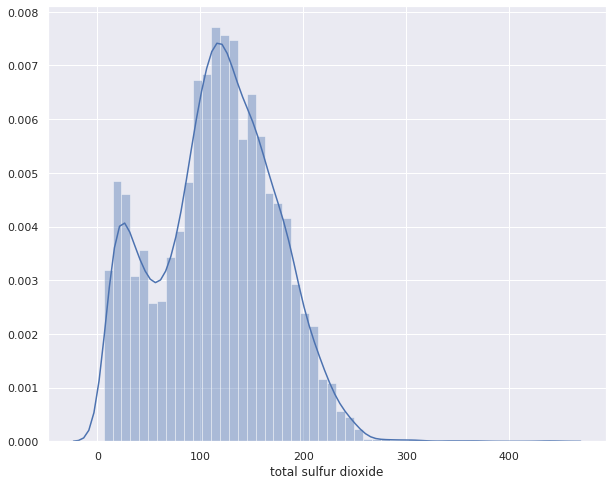

In [36]:
sns.distplot(wine_df['total sulfur dioxide'])

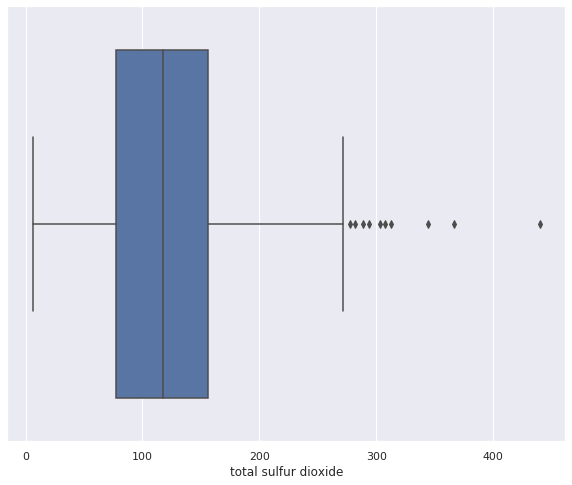

In [37]:
sns.boxplot(wine_df['total sulfur dioxide'])

We see around 10 outliers for sulphates feature.

## Build a Model

**Let's build 2 models, one with outliers and one without outliers and check the performance of the model**


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [39]:
X = wine_df.drop('type', axis=1)
y = wine_df['type']
y = y.map({'red':1,'white':0})

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True,stratify=y)

In [41]:
y_train.head()

1524    0
196     1
105     0
1818    0
2823    0
Name: type, dtype: int64

In [42]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [43]:
clf1=DecisionTreeClassifier(criterion='entropy')

In [44]:
y_pred = cross_val_predict(clf1,X_train,y_train,cv=5)

In [45]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [46]:
accuracy = accuracy_score(y_train,y_pred)
accuracy

0.9830671541273812

In [47]:
precision_score(y_train,y_pred)

0.9677926158680282

In [48]:
recall_score(y_train,y_pred)

0.9632525410476935

In [49]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
from sklearn.tree import export_graphviz

In [51]:
type(X_train)

numpy.ndarray

In [52]:
clf1.feature_importances_

array([0.00148239, 0.05915452, 0.00461496, 0.01128669, 0.57593937,
       0.0079844 , 0.26520095, 0.03363248, 0.01621596, 0.01725925,
       0.00722904, 0.        ])

In [53]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

**From the above we can clearly tell that chlorides and total sulfur dioxide has a lot of importance in deciding the type of wine.**
